In [1]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [2]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
import seaborn as sns

In [3]:
df = pd.read_csv("bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.shape

(11162, 17)

In [6]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
7477,47,admin.,single,secondary,no,3531,yes,no,cellular,7,jul,49,6,-1,0,unknown,no
10845,31,management,married,tertiary,no,22867,yes,no,unknown,27,may,241,2,-1,0,unknown,no
3605,30,technician,single,secondary,no,2371,no,no,cellular,14,jun,661,1,384,2,other,yes
9515,35,management,married,tertiary,no,451,yes,no,cellular,17,apr,220,6,-1,0,unknown,no
7907,48,blue-collar,married,primary,no,363,yes,no,unknown,18,jun,257,6,-1,0,unknown,no
5774,40,blue-collar,divorced,secondary,no,-90,yes,no,unknown,28,may,130,1,-1,0,unknown,no
2850,72,retired,married,secondary,no,0,no,no,cellular,29,oct,189,3,-1,0,unknown,yes
639,39,technician,single,secondary,no,391,no,yes,cellular,30,jul,962,4,-1,0,unknown,yes
9054,36,technician,married,secondary,no,-179,yes,no,cellular,17,jul,144,1,-1,0,unknown,no
3869,36,self-employed,single,tertiary,no,353,no,no,cellular,11,aug,361,2,181,2,success,yes


In [7]:
df.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [8]:
df.default.value_counts()

no     10994
yes      168
Name: default, dtype: int64

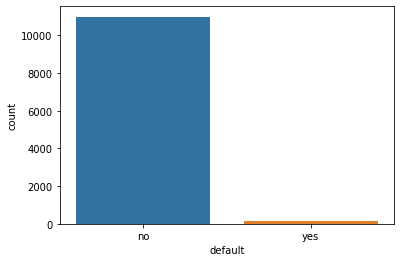

In [9]:
sns.countplot(x='default',data=df)

In [10]:
df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

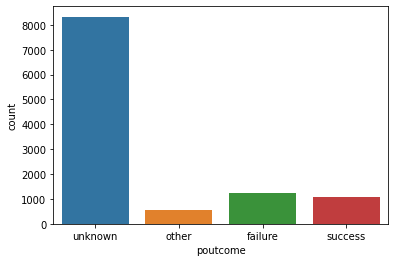

In [11]:
sns.countplot(x='poutcome',data=df)

In [12]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

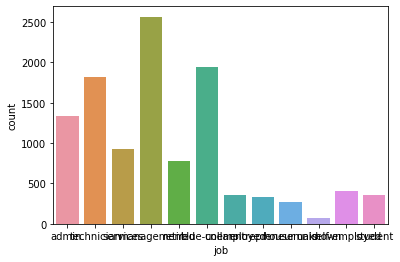

In [13]:
sns.countplot(x='job',data=df)

In [14]:
df.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

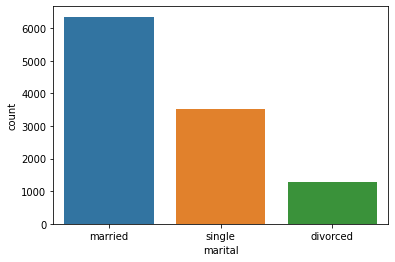

In [15]:
sns.countplot(x='marital',data=df)

In [16]:
df.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

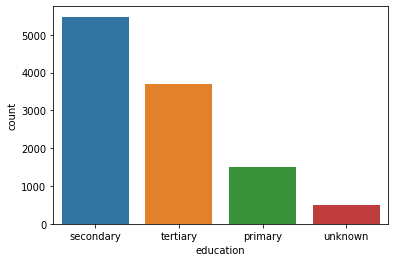

In [17]:
sns.countplot(x='education',data=df)

In [18]:
df.drop('contact', inplace=True, axis=1)
df.drop('day', inplace=True, axis=1)

In [19]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,854.000000,58.000000


In [20]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   month      11162 non-null  object
 9   duration   11162 non-null  int64 
 10  campaign   11162 non-null  int64 
 11  pdays      11162 non-null  int64 
 12  previous   11162 non-null  int64 
 13  poutcome   11162 non-null  object
 14  deposit    11162 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.3+ MB


In [22]:
df["balance"].max()

81204

In [23]:
df["balance"].min()

-6847

In [24]:
le = preprocessing.LabelEncoder()
df['job'] = le.fit_transform(df['job'])

In [25]:
df['marital'] = le.fit_transform(df['marital'])

In [26]:
df['education'] = le.fit_transform(df['education'])

In [27]:
df['default'] = le.fit_transform(df['default'])

In [28]:
df['housing'] = le.fit_transform(df['housing'])

In [29]:
df['loan'] = le.fit_transform(df['loan'])

In [30]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,may,1042,1,-1,0,unknown,yes
1,56,0,1,1,0,45,0,0,may,1467,1,-1,0,unknown,yes


In [31]:
df['deposit'] = le.fit_transform(df['deposit'])

In [32]:
df.drop(['poutcome', 'previous','pdays','month'], axis = 1,inplace = True)

In [33]:
df

,age,job,marital,education,default,balance,housing,loan,duration,campaign,deposit
0,59,0,1,1,0,2343,1,0,1042,1,1
1,56,0,1,1,0,45,0,0,1467,1,1
2,41,9,1,1,0,1270,1,0,1389,1,1
3,55,7,1,1,0,2476,1,0,579,1,1
4,54,0,1,2,0,184,0,0,673,2,1
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,257,1,0
11158,39,7,1,1,0,733,0,0,83,4,0
11159,32,9,2,1,0,29,0,0,156,2,0
11160,43,9,1,1,0,0,0,1,9,2,0


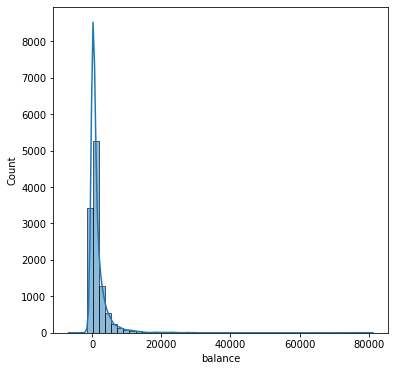

In [34]:
fig_dims = (6, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(df['balance'],kde=True,bins=50)

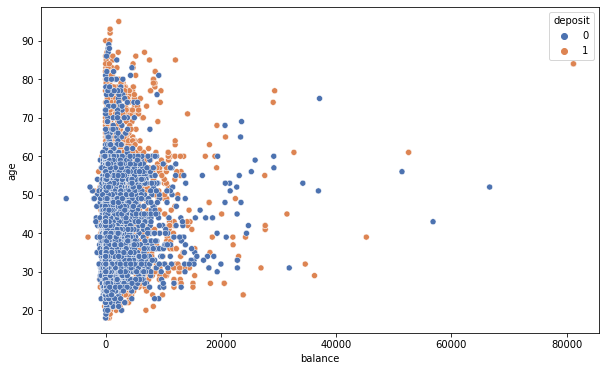

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='balance',y='age',data=df,hue='deposit' ,palette = 'deep')

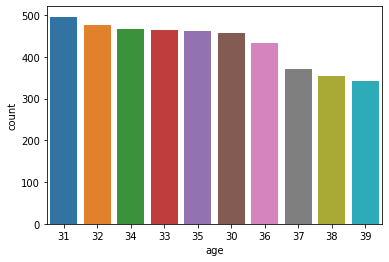

In [36]:
sns.countplot(x='age',data=df, order=df.age.value_counts().iloc[:10].index)

In [37]:
df_feature = df.drop("deposit",axis=1)
df_target = df.deposit

In [38]:
df_feature

,age,job,marital,education,default,balance,housing,loan,duration,campaign
0,59,0,1,1,0,2343,1,0,1042,1
1,56,0,1,1,0,45,0,0,1467,1
2,41,9,1,1,0,1270,1,0,1389,1
3,55,7,1,1,0,2476,1,0,579,1
4,54,0,1,2,0,184,0,0,673,2
...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,257,1
11158,39,7,1,1,0,733,0,0,83,4
11159,32,9,2,1,0,29,0,0,156,2
11160,43,9,1,1,0,0,0,1,9,2


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feature,df_target,test_size=0.33, random_state=42)

In [79]:
from keras.callbacks import EarlyStopping
# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=20)]


In [135]:
# from tensorflow import keras
# opt = keras.optimizers.Adam(learning_rate=0.000001)

def build_model():
  model = keras.Sequential([
    layers.Dense(64,input_shape=[len(X_train.keys())]),#projection layer
    layers.Dense(128, activation='relu'),#,input_shape=[len(X_train.keys())]),
    Dropout(0.3),
    layers.Dense(64, activation='relu'),
    Dropout(0.3),
    layers.Dense(32, activation='relu'),
    Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='BinaryCrossentropy',
                optimizer="adam",
                metrics=['accuracy'])
  return model

In [136]:
model = build_model()

In [137]:
from keras.utils.np_utils import to_categorical
history = model.fit(
  X_train,
  y_train,
  epochs=150,
  batch_size=32,
  callbacks = mycallbacks, # early stopping
  validation_data=(X_test, y_test))

Epoch 1/150
234/234 [==============================] - 2s 4ms/step - loss: 11.1003 - accuracy: 0.5435 - val_loss: 0.6928 - val_accuracy: 0.6870
Epoch 2/150
234/234 [==============================] - 1s 3ms/step - loss: 1.2332 - accuracy: 0.5806 - val_loss: 0.6636 - val_accuracy: 0.6406
Epoch 3/150
234/234 [==============================] - 1s 3ms/step - loss: 0.7061 - accuracy: 0.6226 - val_loss: 0.6296 - val_accuracy: 0.6669
Epoch 4/150
234/234 [==============================] - 1s 4ms/step - loss: 0.6827 - accuracy: 0.6395 - val_loss: 0.6215 - val_accuracy: 0.6607
Epoch 5/150
234/234 [==============================] - 1s 3ms/step - loss: 0.6751 - accuracy: 0.6094 - val_loss: 0.6288 - val_accuracy: 0.6010
Epoch 6/150
234/234 [==============================] - 1s 3ms/step - loss: 0.6738 - accuracy: 0.6158 - val_loss: 0.6367 - val_accuracy: 0.6466
Epoch 7/150
234/234 [==============================] - 1s 3ms/step - loss: 0.6535 - accuracy: 0.6248 - val_loss: 0.6207 - val_accuracy: 0.645

In [138]:
accuracy = model.evaluate(X_test, y_test, verbose=2)
print(accuracy)

116/116 - 0s - loss: 0.5368 - accuracy: 0.7432
[0.5368212461471558, 0.7432138919830322]
